In [45]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
  
# For data manipulation
import pandas as pd
import numpy as np
  
# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
  
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [47]:
df = pd.read_csv('MSFT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-23,237.490005,241.050003,237.070007,237.580002,235.660446,31638400
1,2021-03-24,237.850006,238.000000,235.320007,235.460007,233.557587,25620100
2,2021-03-25,235.300003,236.940002,231.570007,232.339996,230.462799,34061900
3,2021-03-26,231.550003,236.710007,231.550003,236.479996,234.569336,25479900
4,2021-03-29,236.589996,236.800003,231.880005,235.240005,233.339355,25227500
...,...,...,...,...,...,...,...
249,2022-03-17,293.290009,295.609985,289.369995,295.220001,295.220001,30816600
250,2022-03-18,295.369995,301.000000,292.730011,300.429993,300.429993,43317000
251,2022-03-21,298.890015,300.140015,294.899994,299.160004,299.160004,28351200
252,2022-03-22,299.799988,305.000000,298.769989,304.059998,304.059998,27579500


In [48]:
# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])
df
  
# drop The original date column
df = df.drop(['Date'], axis='columns')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-23,237.490005,241.050003,237.070007,237.580002,235.660446,31638400
2021-03-24,237.850006,238.000000,235.320007,235.460007,233.557587,25620100
2021-03-25,235.300003,236.940002,231.570007,232.339996,230.462799,34061900
2021-03-26,231.550003,236.710007,231.550003,236.479996,234.569336,25479900
2021-03-29,236.589996,236.800003,231.880005,235.240005,233.339355,25227500
...,...,...,...,...,...,...
2022-03-17,293.290009,295.609985,289.369995,295.220001,295.220001,30816600
2022-03-18,295.369995,301.000000,292.730011,300.429993,300.429993,43317000
2022-03-21,298.890015,300.140015,294.899994,299.160004,299.160004,28351200


In [49]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
  
# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2021-03-23,-0.089997,3.979996
2021-03-24,2.389999,2.679993
2021-03-25,2.960007,5.369995
2021-03-26,-4.929993,5.160004
2021-03-29,1.349991,4.919998


In [51]:
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0])

In [52]:
split_percentage = 0.8
split = int(split_percentage*len(df))
  
# Train data set
X_train = X[:split]
y_train = y[:split]
  
# Test data set
X_test = X[split:]
y_test = y[split:]

In [53]:
cls = SVC().fit(X_train, y_train)

In [54]:
df['Predicted_Signal'] = cls.predict(X)

In [55]:
df['Return'] = df.Close.pct_change()

In [56]:
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

In [57]:
df['Cum_Ret'] = df['Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,
2021-03-23,237.490005,241.050003,237.070007,237.580002,235.660446,31638400,-0.089997,3.979996,0,NaN,NaN,NaN
2021-03-24,237.850006,238.000000,235.320007,235.460007,233.557587,25620100,2.389999,2.679993,0,-0.008923,-0.000000,-0.008923
2021-03-25,235.300003,236.940002,231.570007,232.339996,230.462799,34061900,2.960007,5.369995,1,-0.013251,-0.000000,-0.022174
2021-03-26,231.550003,236.710007,231.550003,236.479996,234.569336,25479900,-4.929993,5.160004,1,0.017819,0.017819,-0.004355
2021-03-29,236.589996,236.800003,231.880005,235.240005,233.339355,25227500,1.349991,4.919998,1,-0.005244,-0.005244,-0.009599
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-17,293.290009,295.609985,289.369995,295.220001,295.220001,30816600,-1.929992,6.239990,1,0.002819,0.000000,0.244625
2022-03-18,295.369995,301.000000,292.730011,300.429993,300.429993,43317000,-5.059998,8.269989,1,0.017648,0.017648,0.262273
2022-03-21,298.890015,300.140015,294.899994,299.160004,299.160004,28351200,-0.269989,5.240021,1,-0.004227,-0.004227,0.258045


In [58]:
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2021-03-23,237.490005,241.050003,237.070007,237.580002,235.660446,31638400,-0.089997,3.979996,0,NaN,NaN,NaN,NaN
2021-03-24,237.850006,238.000000,235.320007,235.460007,233.557587,25620100,2.389999,2.679993,0,-0.008923,-0.000000,-0.008923,0.000000
2021-03-25,235.300003,236.940002,231.570007,232.339996,230.462799,34061900,2.960007,5.369995,1,-0.013251,-0.000000,-0.022174,0.000000
2021-03-26,231.550003,236.710007,231.550003,236.479996,234.569336,25479900,-4.929993,5.160004,1,0.017819,0.017819,-0.004355,0.017819
2021-03-29,236.589996,236.800003,231.880005,235.240005,233.339355,25227500,1.349991,4.919998,1,-0.005244,-0.005244,-0.009599,0.012575
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-17,293.290009,295.609985,289.369995,295.220001,295.220001,30816600,-1.929992,6.239990,1,0.002819,0.000000,0.244625,0.128673
2022-03-18,295.369995,301.000000,292.730011,300.429993,300.429993,43317000,-5.059998,8.269989,1,0.017648,0.017648,0.262273,0.146321
2022-03-21,298.890015,300.140015,294.899994,299.160004,299.160004,28351200,-0.269989,5.240021,1,-0.004227,-0.004227,0.258045,0.142094


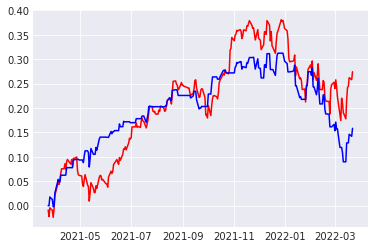

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
  
plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')

In [1]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))

NameError: name 'y' is not defined